# Book Similarity Application
This notebook shows how to use the book similarity application. It uses cosine similarity and genre preferences to recommend books.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_processing import get_user_preferences, calculate_similarity
from api import get_user_book_summaries, get_other_book_data

## Load Dataset
Loading the books data from a CSV file into a Pandas DataFrame.

In [5]:
df = pd.read_csv("books.csv")

## User Preferences
Enter your favorite books, favorite genre, and the genre you're looking to explore.

In [6]:
isbn_list, genre, genre_to_read = get_user_preferences(df)

Enter the titles of your favorite books (no punctuation), separated by commas:  harry potter, lord of the rings
Enter your favorite genre:  action
Enter the genre you're looking to read:  fantasy


## Fetch Summaries and Calculate Similarity

In [13]:
print(f"\nSearching for similarities of {isbn_list} in {genre_to_read} and {genre}...\n")

user_summaries, book_names = get_user_book_summaries(isbn_list)
other_book_data = get_other_book_data(genre, genre_to_read, book_names)

similarities = calculate_similarity(user_summaries, other_book_data)

most_similar_books = np.argsort(similarities)[-3:][::-1]
print("Based on genres and cosine similarity, the recommended books are:\n")

for index in most_similar_books:
    book = other_book_data[index]
    print(f"Title: {book["title"]}\n")
    print(f"Summary: {book["summary"]}\n")


Searching for similarities of ['0439785960', '0747584664', '0563494859'] in Fantasy and Action...

Based on genres and cosine similarity, the recommended books are:

Title: The Black Fortress (The Gryphon Chronicles, Book 6)

Summary: NY Times Bestselling Author E.G. Foley brews up a magical potion for fantasy readers of all ages! Take a dash of Harry Potter and a splash of Oliver Twist, add a pinch of steampunk and a sprinkle of Victorian fairy lore, and what do you get? The Gryphon Chronicles! A rollicking fantasy adventure series that's as much fun for grownups as it is for kids. Behind the iron gates of The Black Fortress, evil gathers its forces, preparing to strike... Three months ago, the horrible news that the Dark Druids captured his beloved pet Gryphon sent thirteen-year-old Jake Everton reeling-especially since he knows he's the one the warlock brotherhood really wants. It's a trap, and poor Red is just the bait. Well aware of the threat, the Elders have forbidden the darin

## Visualize Similarities
Visualizing the similarity scores of the recommended books.

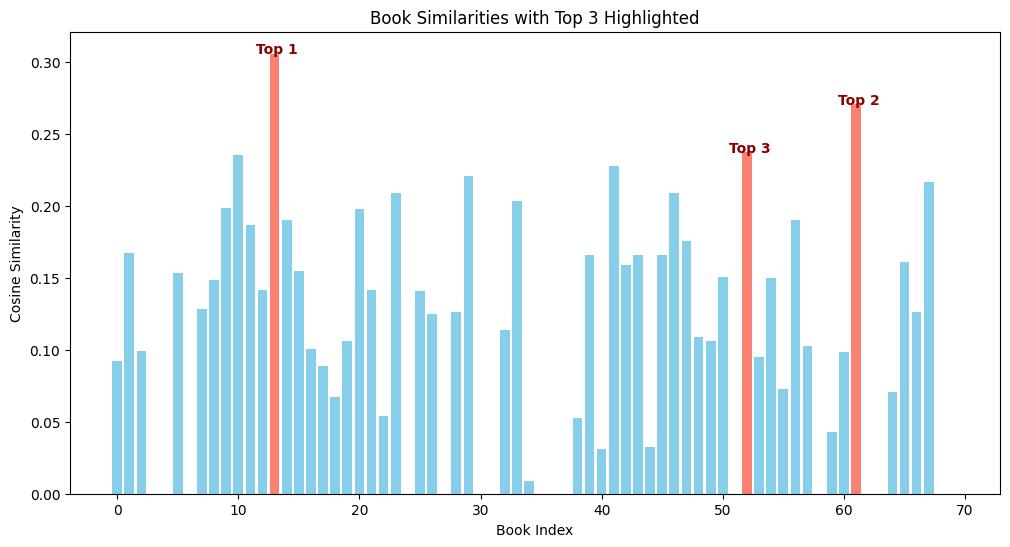

In [14]:
plt.figure(figsize=(12, 6))

bar_colors = ['skyblue' if i not in most_similar_books else 'salmon' for i in range(len(similarities))]

plt.bar(range(len(similarities)), similarities, color=bar_colors)

plt.xlabel('Book Index')
plt.ylabel('Cosine Similarity')
plt.title('Book Similarities with Top 3 Highlighted')

for index in most_similar_books:
    plt.text(x=index, y=similarities[index], s=f' Top {np.where(most_similar_books==index)[0][0]+1}', 
             color='darkred', fontweight='bold', ha='center')

plt.show()